The Basics of Gradient Descent

Gradient descent is an optimization algorithm that attempts to find the minimum of a function.

As the name implies, the algorithm makes use of a function's gradient.

For some function $f(x, y, z, ...)$, we'll use its gradient ,$\nabla f$, to pick successive points closer and closer to a local minimum from some initial guess $(x_{0}, y_{0}, z_{0}, ...)$


Let's start with a simple one-dimensional (one variable) example.

Optimize (Find the minimum value of):
$$f(x) = 7x^2 - 17x - 193$$

<IPython.core.display.Javascript object>


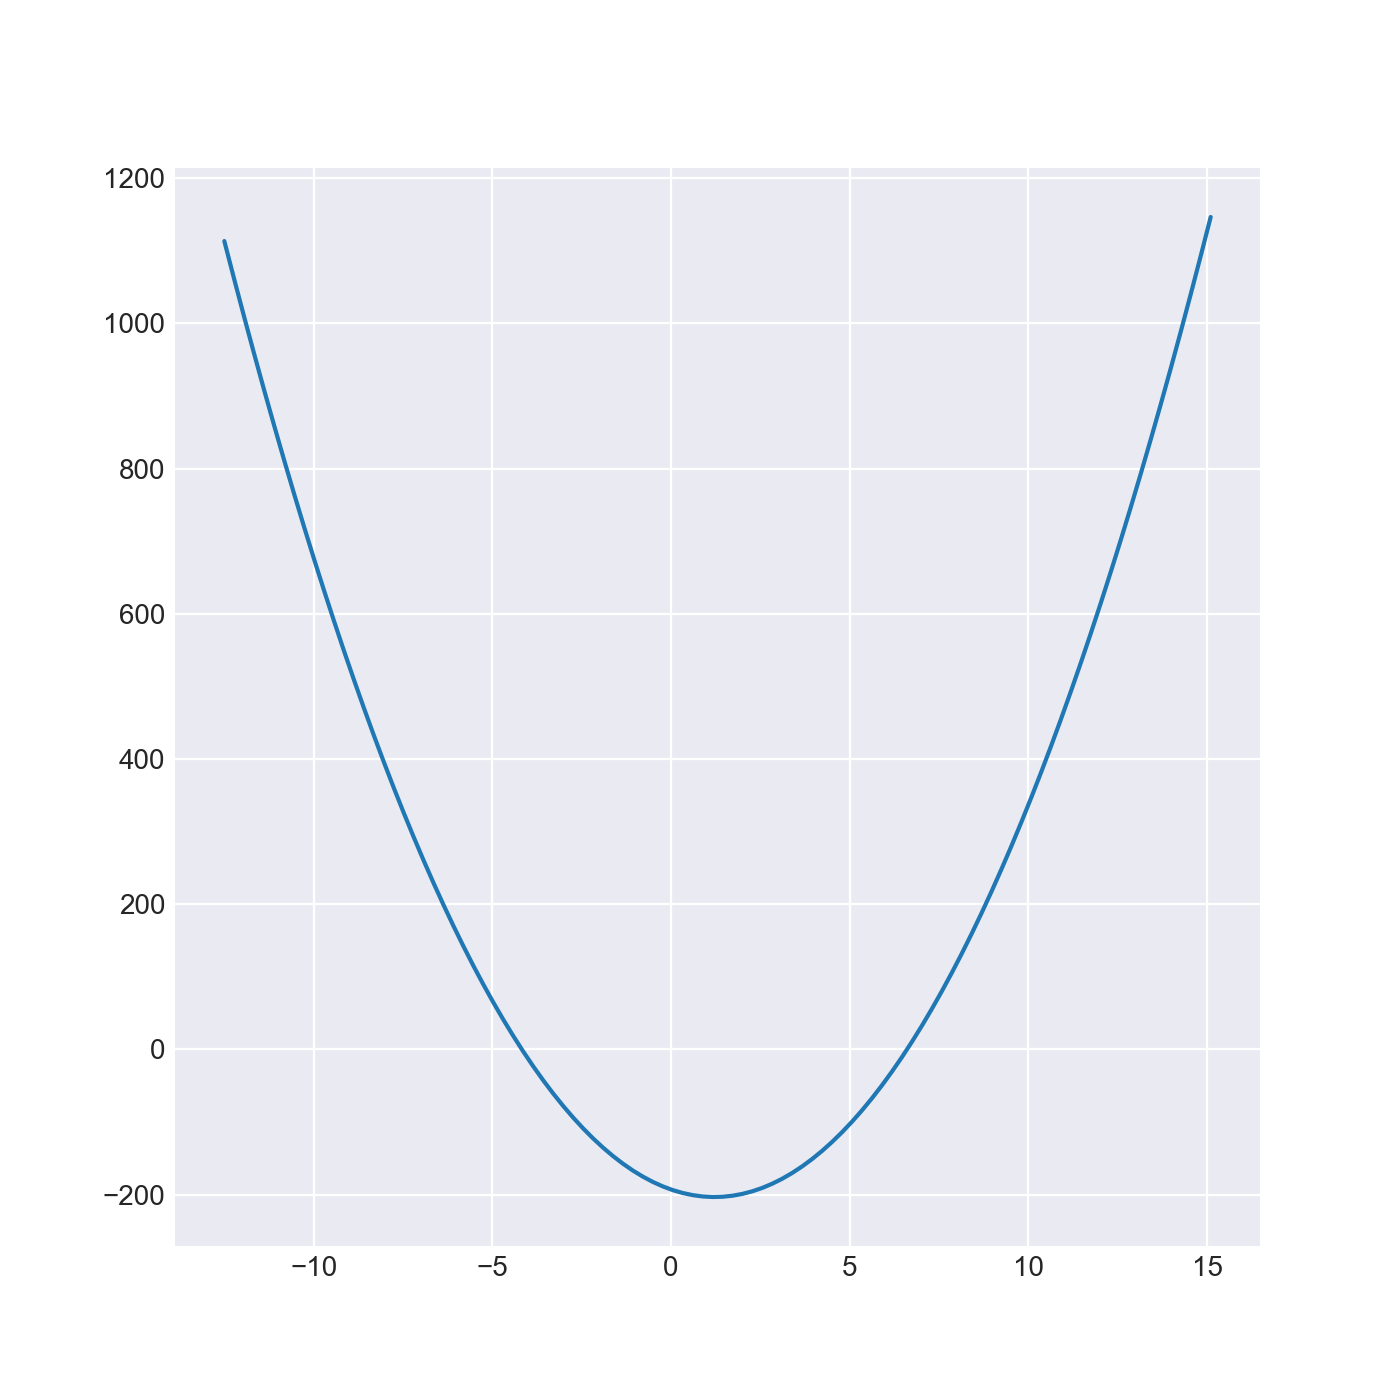

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (7, 7)


def optimize_this(x):
    return 7 * (x ** 2) - 17 * x - 193

graph_x = np.linspace(-12.5, 15.1, 100)
graph_y = optimize_this(graph_x)


sns.set_style("darkgrid")
plt.plot(graph_x, graph_y)
plt.show()

It's a parabola, with the minimum located somewhere between -10 and 10.

Let's start with an initial guess of $x_{0} = 15$, for illustrative purposes.

In practice, the initial guess is a random number, as opposed to a predetermined one.

<IPython.core.display.Javascript object>


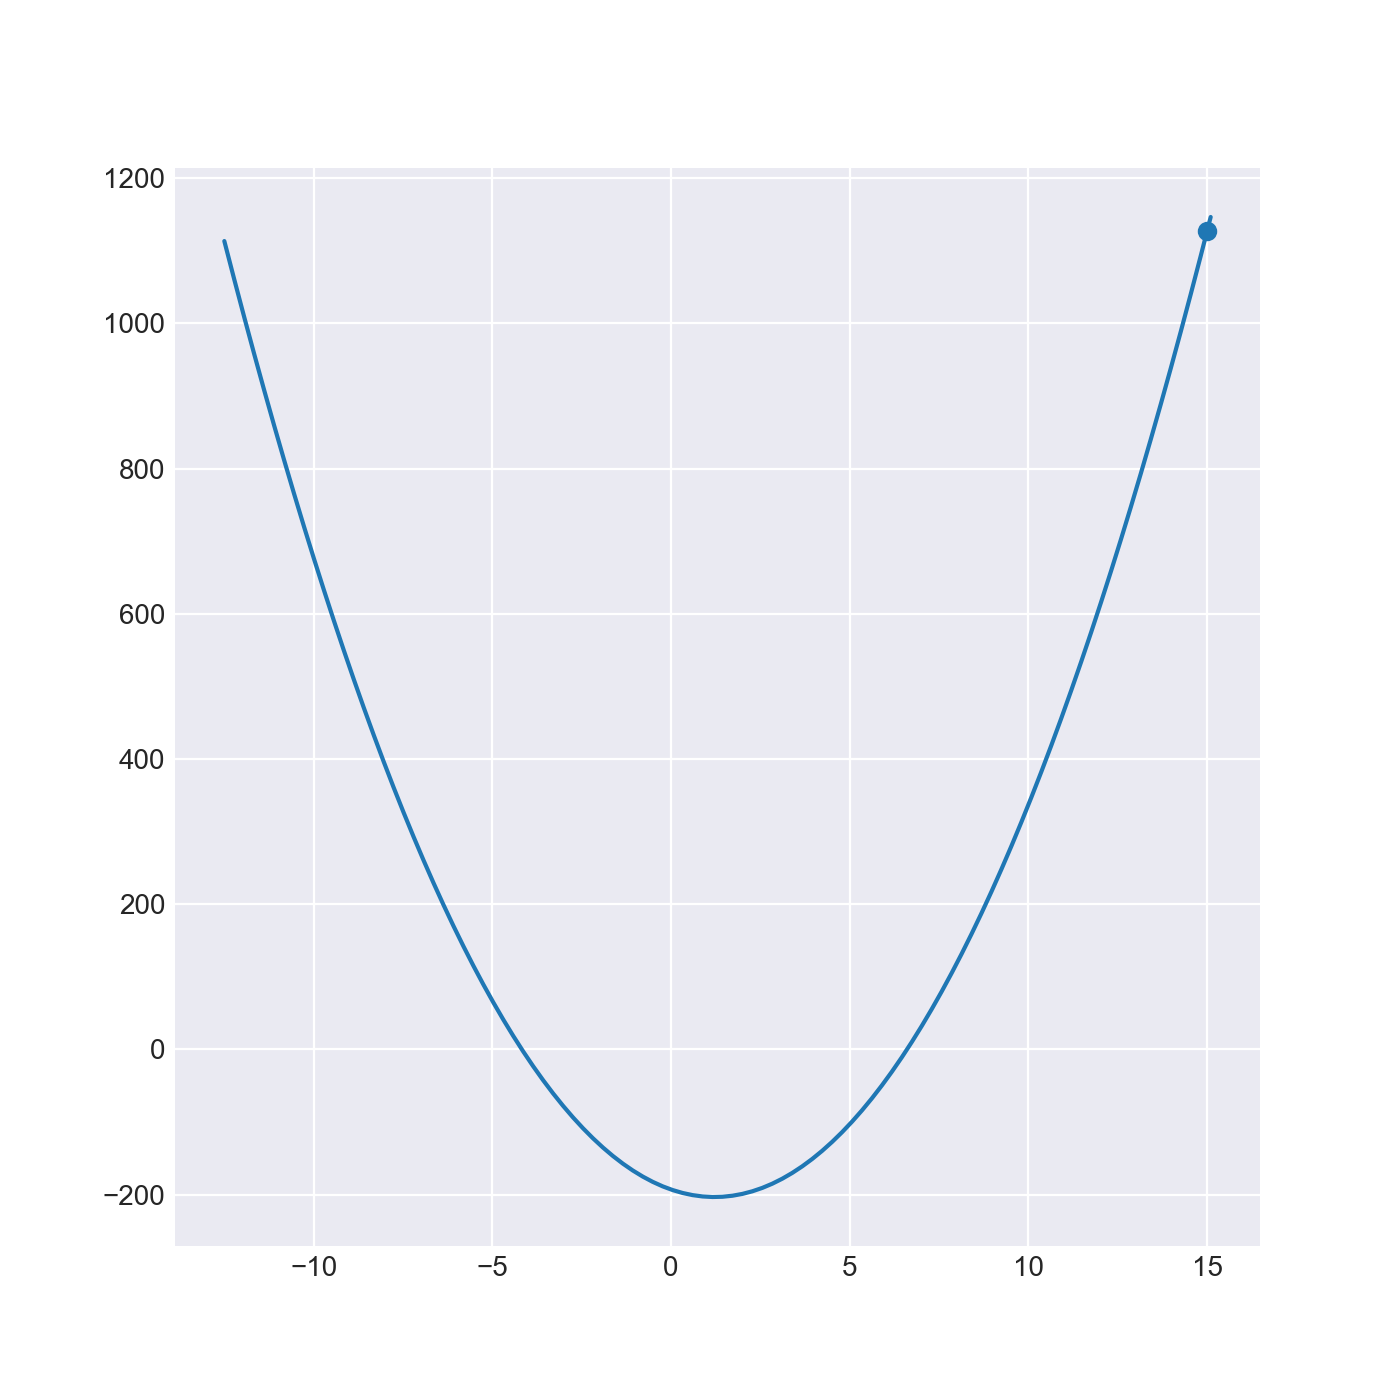

In [2]:
%matplotlib notebook
initial_guess = 15
plt.scatter(initial_guess, optimize_this(initial_guess))
plt.plot(graph_x, graph_y)
plt.show()

Obviously, it's pretty far off from the actual minimum of the parabola.

We need to move our guess to the left of our initial pick to get to the minimum value of the function.

We can start by trying to figure out which way is "downhill".

The gradient of a function tells us which direction is the steepest headed uphill, from a given location, or point. 

If we know which way is the steepest uphill, if we just head in the opposite direction, it should be the steepest downhill as well. 

In order to start with gradient descent, we'll need the gradient. For functions that only have one variable, this is equivalent to taking the derivative. 

$$f(x) = 7x^2 - 17x - 193$$

$$\nabla f(x) = \frac {d}{dx} f(x) = 14x - 17$$

Since the derivative tells us the direction the graph is increasing in, we'll need to adjust our guess in the other direction, in order to head downhill in the steepest direction.

Our new guess, $x_{1}$, will be our old guess, $x_{0}$, nudged in the direction of steepest descent: $\nabla f(x_{n})$.

Written as a recursive function, we get $x_{n+1} = x_{n} - \nabla f(x_{n})$, where $x_{0}$ is the initial guess, can either be user specified, or more commonly, randomly picked by the computer.

In our function's case, our gradient descent recursion is $x_{n+1} = x_{n} - (14x_{n} - 17)$, given that $x_{0} = 15$.

Let's try to automate this process. Below we create a gradient descent function that takes an initial guess, and updates our guess a specified number of times. We'll print the first five values of the minimum value guess from the loop to see how our algorithm is performing. 

In [3]:
# function to minimize - f(x) = 7x^2 - 17x - 193
# f'(x) = 14x - 17


initial_guess = 15

def gradient_descent(starting_point, iterations):
    for i in range(iterations):
        starting_point = starting_point - (14 * starting_point - 17)
    return starting_point

for i in (range(1, 6)):
    print(gradient_descent(initial_guess, i))

-178
2331
-30286
393735
-5118538


It looks like there are some major issues with our algorithm. It doesn't seem to converge on any specific value, instead bouncing between positive and negative numbers, and getting farther and farther away from the actual minimum as the number of iterations increase. Let's visualize what the algorithm is doing.

<IPython.core.display.Javascript object>


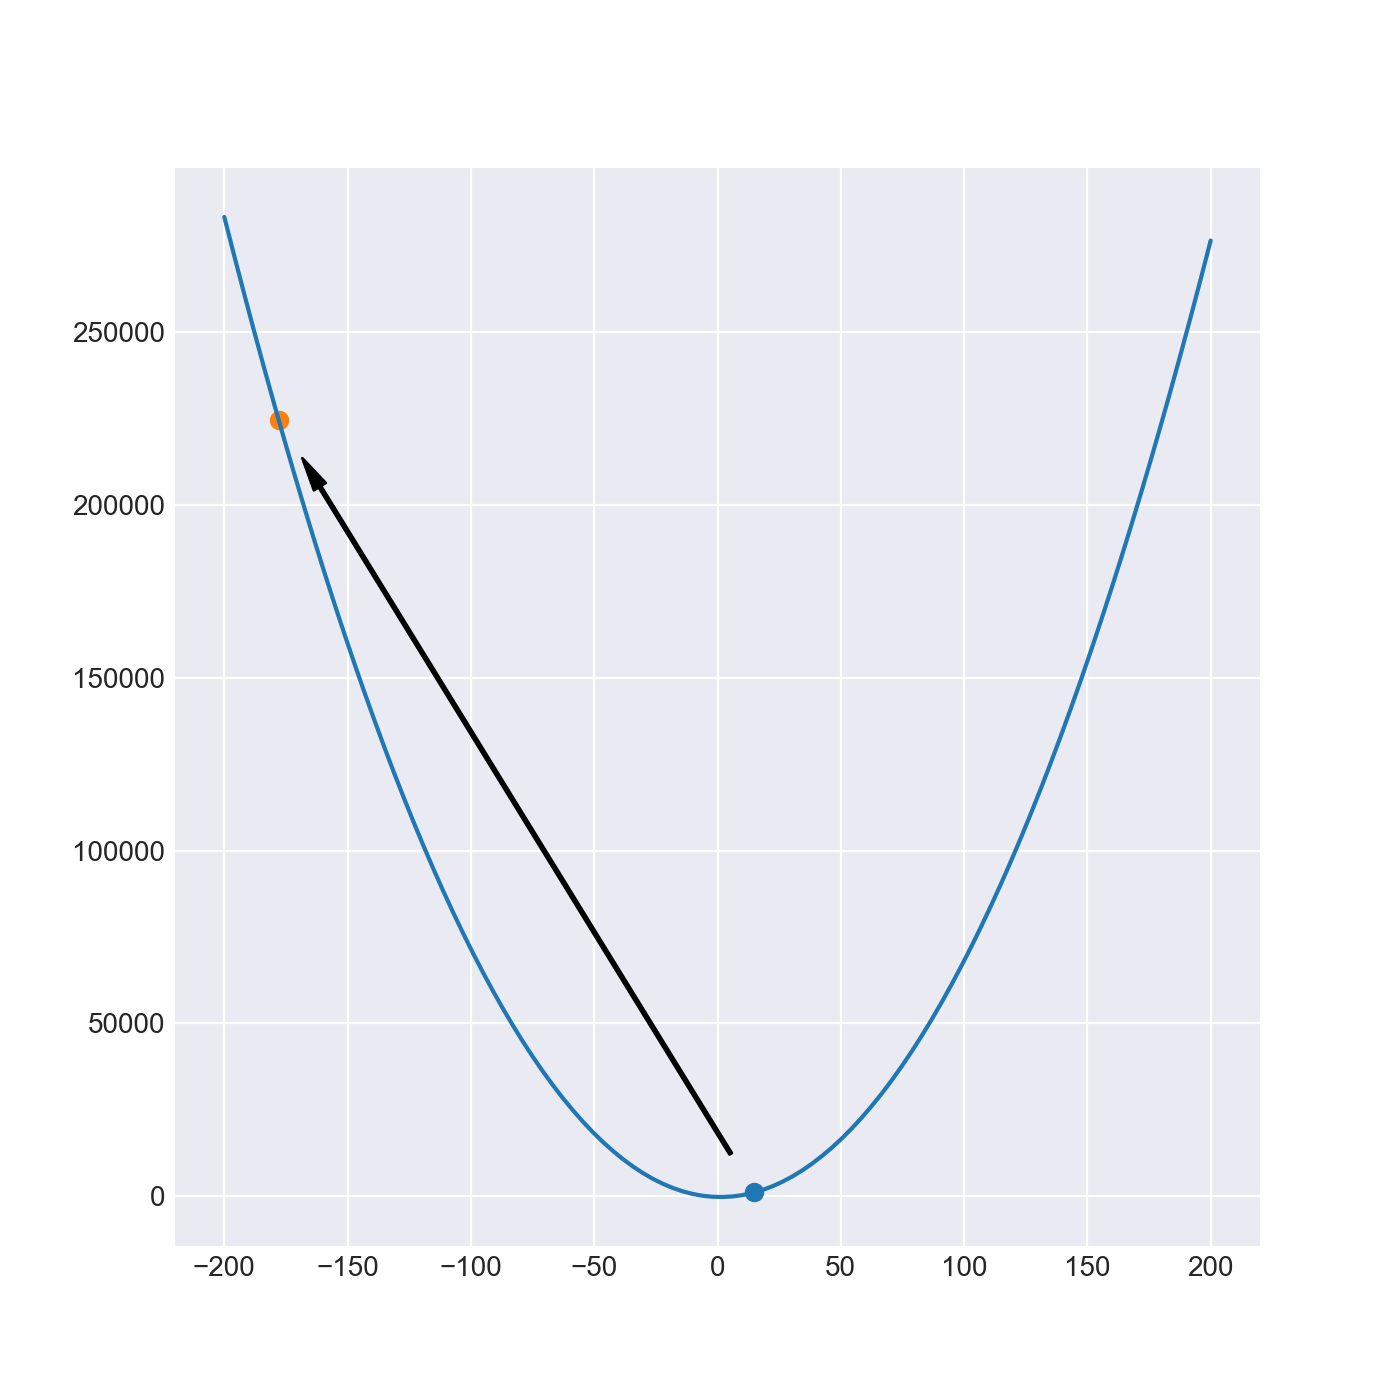

In [4]:
%matplotlib notebook
graph_x = np.linspace(-200, 200, 100)
graph_y = optimize_this(graph_x)
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(0, 2):
    x_value = gradient_descent(initial_guess, i)
    if i > 0:
        x_prev = gradient_descent(initial_guess, i - 1)
        ax.annotate('', xy = (x_value, optimize_this(x_value)),
                   xytext = (x_prev, optimize_this(x_prev)),
                   arrowprops=dict(width = 1, headwidth = 5, frac = 2, facecolor = 'black', shrink = 0.05))
    plt.scatter(x_value, optimize_this(x_value))

sns.set_style("darkgrid")
plt.plot(graph_x, graph_y)
plt.show()

What's going on in the above graph?
Let's step through our algorithm manually.
As a refresher:

$f(x) = 7x^2 - 17x - 193$, This is the function we want to find the minimum of, or which $x$ value will give us the lowest value for $7x^2 - 17x - 193$

$x_{0} = 15$, This is our starting point, or initial guess for the $x$ value that will give us the lowest value for $7x^2 - 17x - 193$.

$\nabla f(x) = 14x - 17$, This is the gradient, which tells us which way is the steepest uphill (and how steep it is) at any given $x$. 

$x_{n+1} = x_{n} - (14x_{n} - 17)$ This is how we will update $x$. Since the gradient tells us which way is the steepest uphill, if we nudge $x$ the other way, we will be heading downhill in the direction that is steepest. 


Starting from our first point $x_{0} = 15$ (the blue point), the value of the function  $f(15) = 7(15)^2 - 17(15) - 193 = 1127$.

The gradient at $x = 15$ is $\nabla f(15) = (14\times 15) - 17 = 193$, which suggests that we should adjust our guess for $x$ to the left by 193 units (since a positive value for the gradient in the one-dimensional case means the function is increasing as we adjust $x$ to the right).

Nudging $x_{0}$, we get a new $x$ value, $x_{1} = 15 - 193 = -178$ (the orange point) 

Since the whole point of the gradient descent algorithm is to update our guess for $x$ such that the value of $f(x)$ is minimized, $f(-178)$ should be less than $f(15)$

However, $f(-178) = 221756$, far greater than $f(15) = 1127$ 

We headed in the right direction, but our guess seems to be even worse than before. What's going on?

We've overshot our target (the minimum), and have gone too far. If we iterate one more time, the problem gets even worse.

<IPython.core.display.Javascript object>


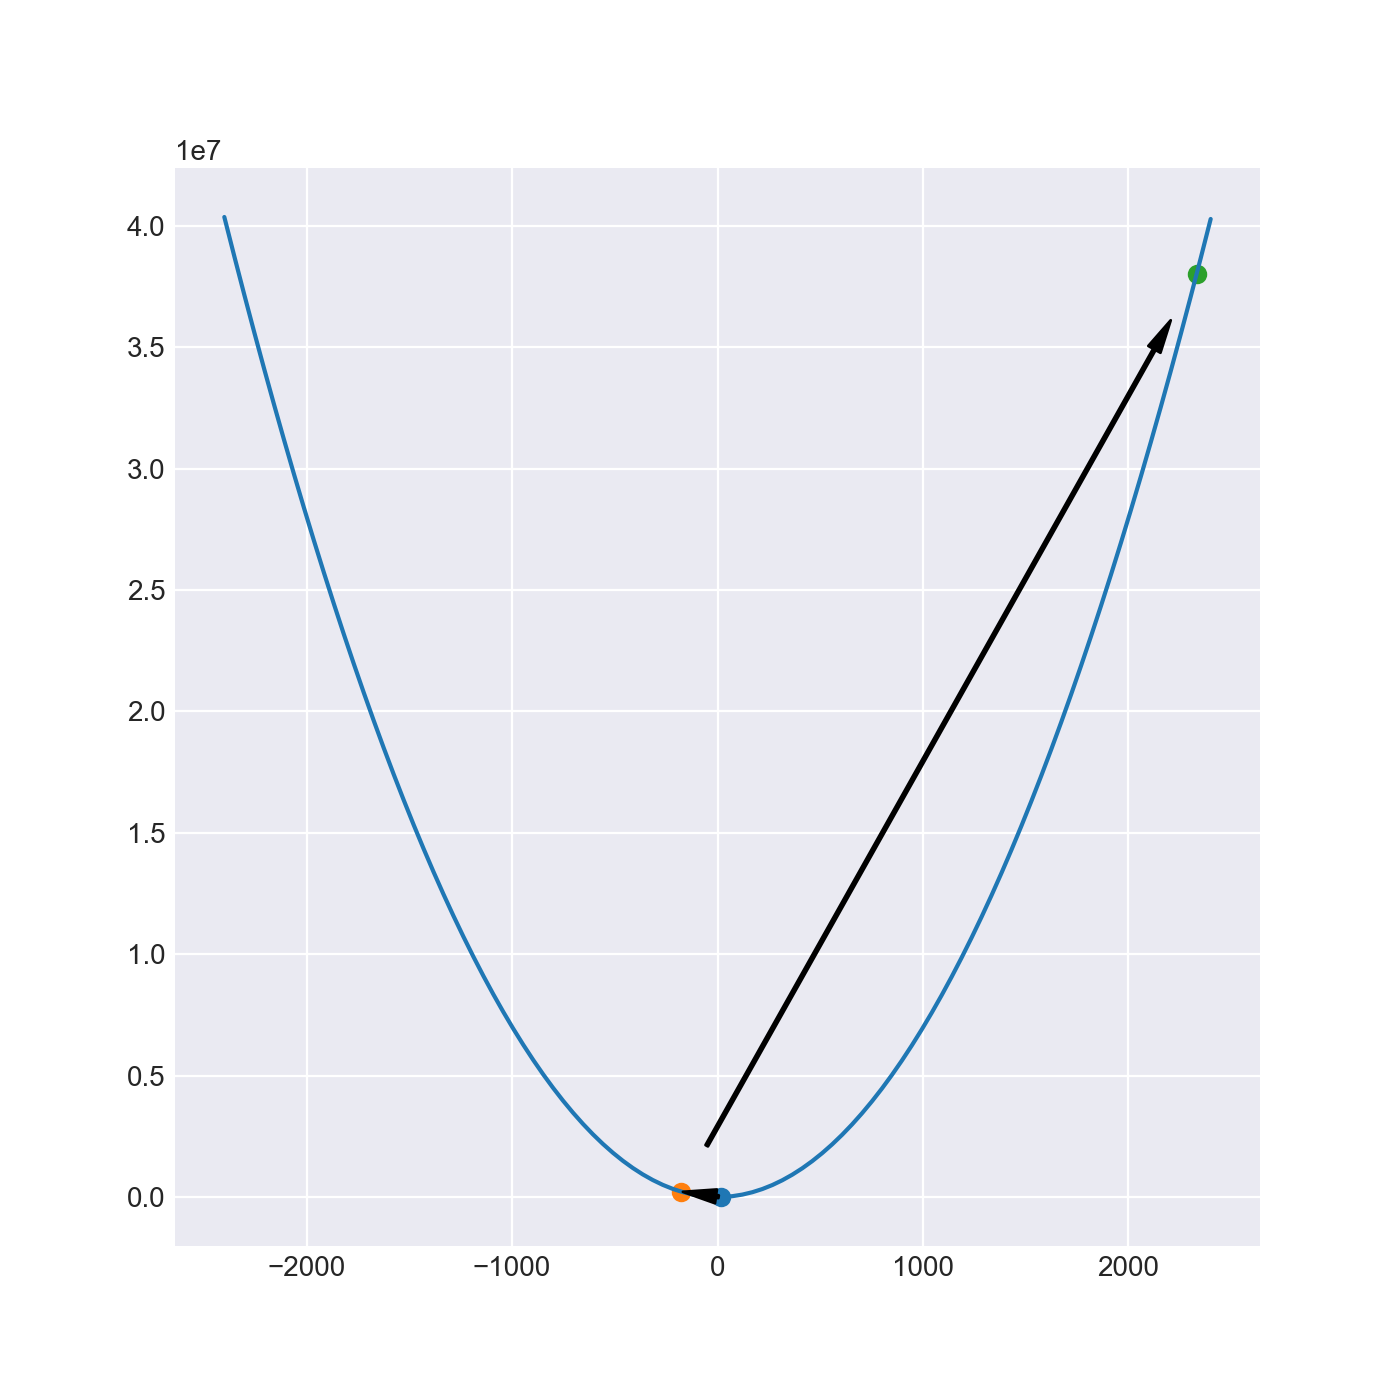

In [5]:
%matplotlib notebook
graph_x = np.linspace(-2400, 2400, 100)
graph_y = optimize_this(graph_x)
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(0, 3):
    x_value = gradient_descent(initial_guess, i)
    if i > 0:
        x_prev = gradient_descent(initial_guess, i - 1)
        ax.annotate('', xy = (x_value, optimize_this(x_value)),
                   xytext = (x_prev, optimize_this(x_prev)),
                   arrowprops=dict(width = 1, headwidth = 5, frac = 2, facecolor = 'black', shrink = 0.05))
    plt.scatter(x_value, optimize_this(x_value))
    
sns.set_style("darkgrid")
plt.plot(graph_x, graph_y)
plt.show()

With $f(15) = 1127$ (blue point) and $f(-178) = 221756$ (orange point), we iterate through the gradient descent algorithm one more time, with $\nabla f(-178) = (14\times -178) - 17 = -2509$

Update $x$ such that $x_{2} = -178 - -2509 = 2331$. Then, $f(2331) = 37995107$

Again it seems that the algorithm knows which direction to adjust $x$ in, it just keeps overshooting the minimum, ping-ponging between the two sides of the parabola upwards and upwards to infinity, which is the exact opposite of what we wanted in the first place. 

Let's change our gradient descent algorithm, $x_{n+1} = x_{n} - \nabla f(x_{n})$. 
By adding $\alpha$, a learning rate parameter, we can adjust how much the algorithm will nudge $x$. 

$$x_{n+1} = x_{n} - \alpha\nabla f(x_{n})$$

Since our old algorithm without $\alpha$ had our estimate "explode" to infinity, we'll set our $\alpha = 0.1$. (Our old algorithm had an implied $\alpha$ of 1, so now $x$ should be nudged a tenth as much as compared to before.)

<IPython.core.display.Javascript object>


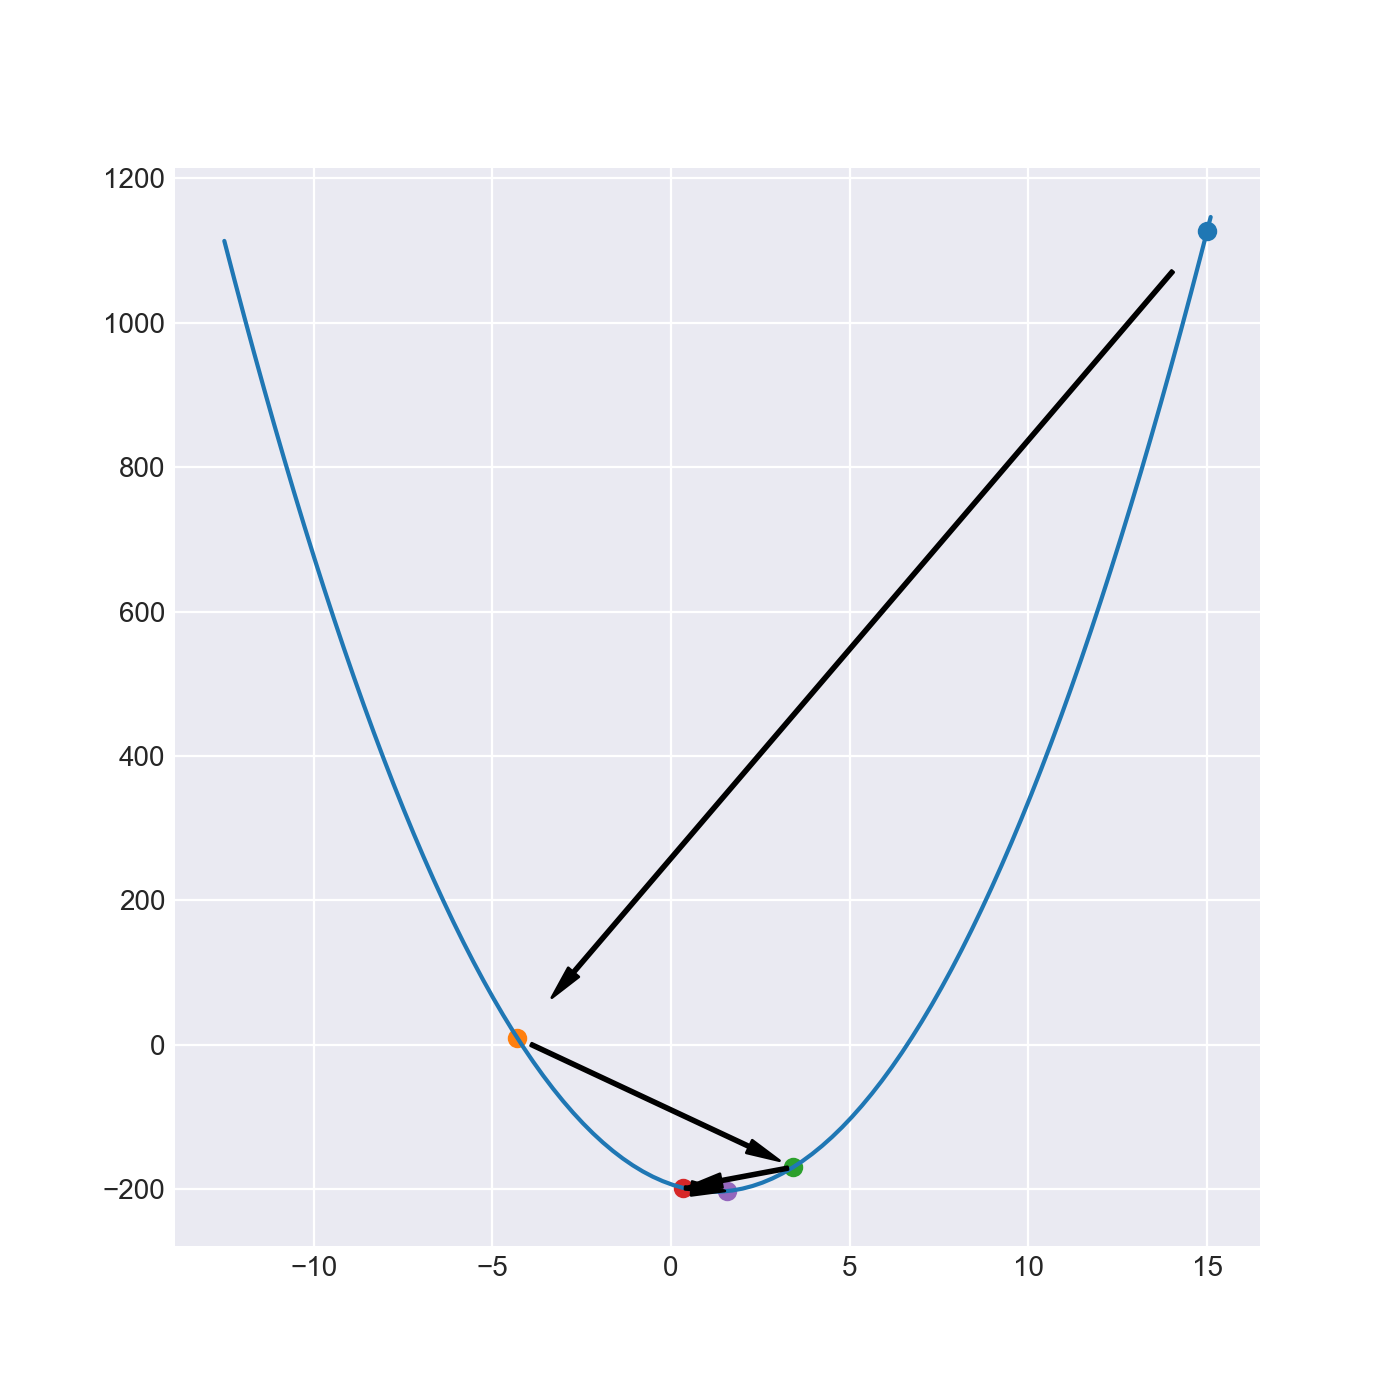

In [9]:
%matplotlib notebook
# function to minimize - f(x) = 7x^2 - 17x - 193
# f'(x) = 14x - 17

initial_guess = 15
learning_parameter = 0.1

def gradient_descent(starting_point, learning_rate, iterations):
    for i in range(iterations):
        starting_point = starting_point - learning_parameter * (14 * starting_point - 17)
    return starting_point   

graph_x = np.linspace(-12.5, 15.1, 100)
graph_y = optimize_this(graph_x)
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(0, 5):
    x_value = gradient_descent(initial_guess, learning_parameter, i)
    if i > 0:
        x_prev = gradient_descent(initial_guess, learning_parameter, i - 1)
        ax.annotate('', xy = (x_value, optimize_this(x_value)),
                   xytext = (x_prev, optimize_this(x_prev)),
                   arrowprops = dict(width = 1, headwidth = 5, frac = 2, facecolor = 'black', shrink = 0.05))
    plt.scatter(x_value, optimize_this(x_value))

sns.set_style("darkgrid")
plt.plot(graph_x, graph_y)
plt.show()

Much better. We can see that, while it still overshoots the minimum (from the blue dot on the top right to the green dot on the left), the guess will eventually settle into the local minimum.

In [7]:
for i in (1, 2, 3, 4, 5, 10, 100, 100000):
    print(gradient_descent(initial_guess, learning_parameter, i))

-4.300000000000001
3.4200000000000017
0.33199999999999896
1.5672000000000006
1.0731199999999996
1.2157312511999998
1.2142857142857142
1.2142857142857142


We can see that the gradient descent's guess stabilizes at 1.2142857142857142. If we set $\alpha = 0.01$ the algorithm no longer ping-pongs across the minimum, instead sliding down the side of the parabola towards the minimum.

<IPython.core.display.Javascript object>


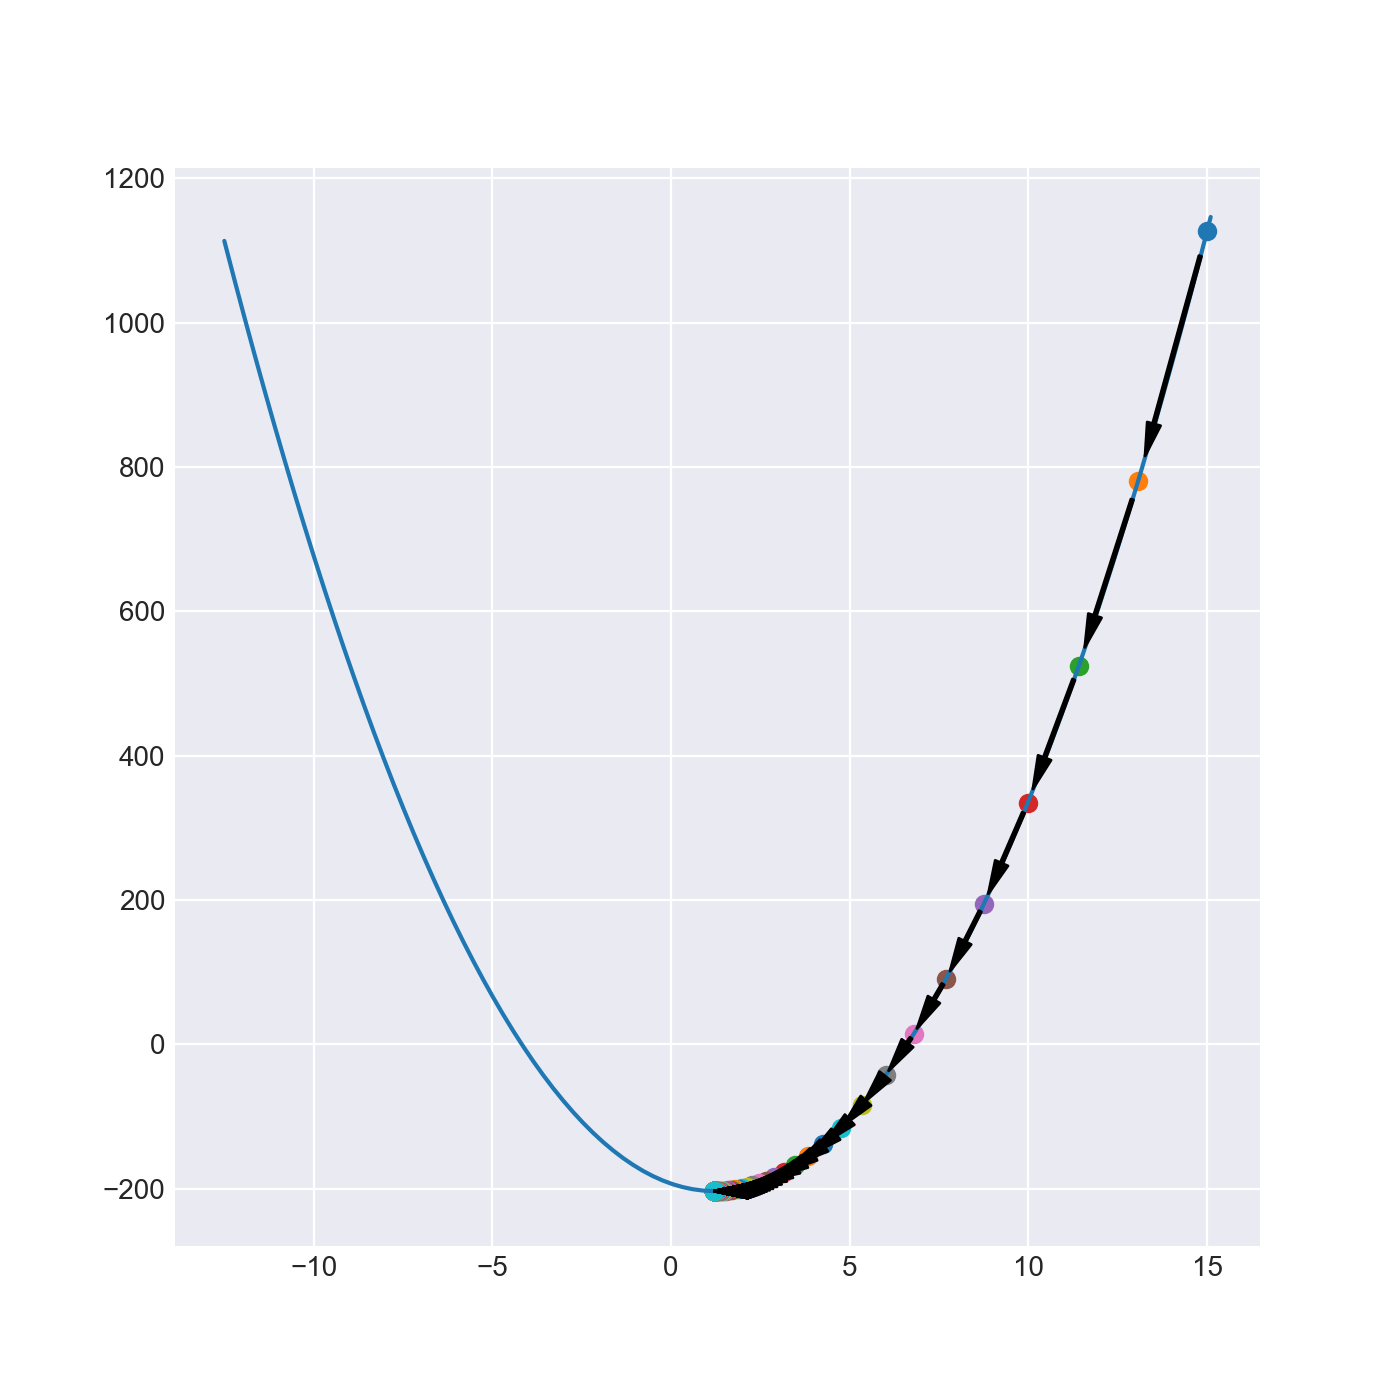

1.2142895982425763


In [20]:
%matplotlib notebook
# function to minimize - f(x) = 7x^2 - 17x - 193
# f'(x) = 14x - 17

initial_guess = 15
learning_parameter = 0.01

def gradient_descent(starting_point, learning_rate, iterations):
    for i in range(iterations):
        starting_point = starting_point - learning_parameter * (14 * starting_point - 17)
    return starting_point   

graph_x = np.linspace(-12.5, 15.1, 100)
graph_y = optimize_this(graph_x)
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(0, 100):
    x_value = gradient_descent(initial_guess, learning_parameter, i)
    if i > 0:
        x_prev = gradient_descent(initial_guess, learning_parameter, i - 1)
        ax.annotate('', xy = (x_value, optimize_this(x_value)),
                   xytext = (x_prev, optimize_this(x_prev)),
                   arrowprops = dict(width = 1, headwidth = 5, frac = 2, facecolor = 'black', shrink = 0.1))
    plt.scatter(x_value, optimize_this(x_value))

sns.set_style("darkgrid")
plt.plot(graph_x, graph_y)
plt.show()

print(gradient_descent(initial_guess, learning_parameter, 100))

This time, the algorithm stabilizes at 1.2142895982425763, slightly different from the previous result with $\alpha = 0.1$. Because $\alpha$ affects how much $x$ is nudged, $\alpha = 0.01$ will nudge only a tenth as much as $\alpha = 0.1$

The actual answer turns out to be $\frac {17}{14}$. We can get the solution for the minimum of $f(x)$ analytically by setting $\nabla f(x) = 14x - 17 = 0$, since $f(x)$ is a parabola, and is convex.

So why bother with gradient descent anyways?

While finding the minimum of a parabola is relatively trivial, gradient descent can be used for functions of many variables $f(x, y, z, ...)$ while being computationally cheap, especially when there are large quanities of data that influence the value of a function, such as fitting neural networks to large data sets. 

<IPython.core.display.Javascript object>


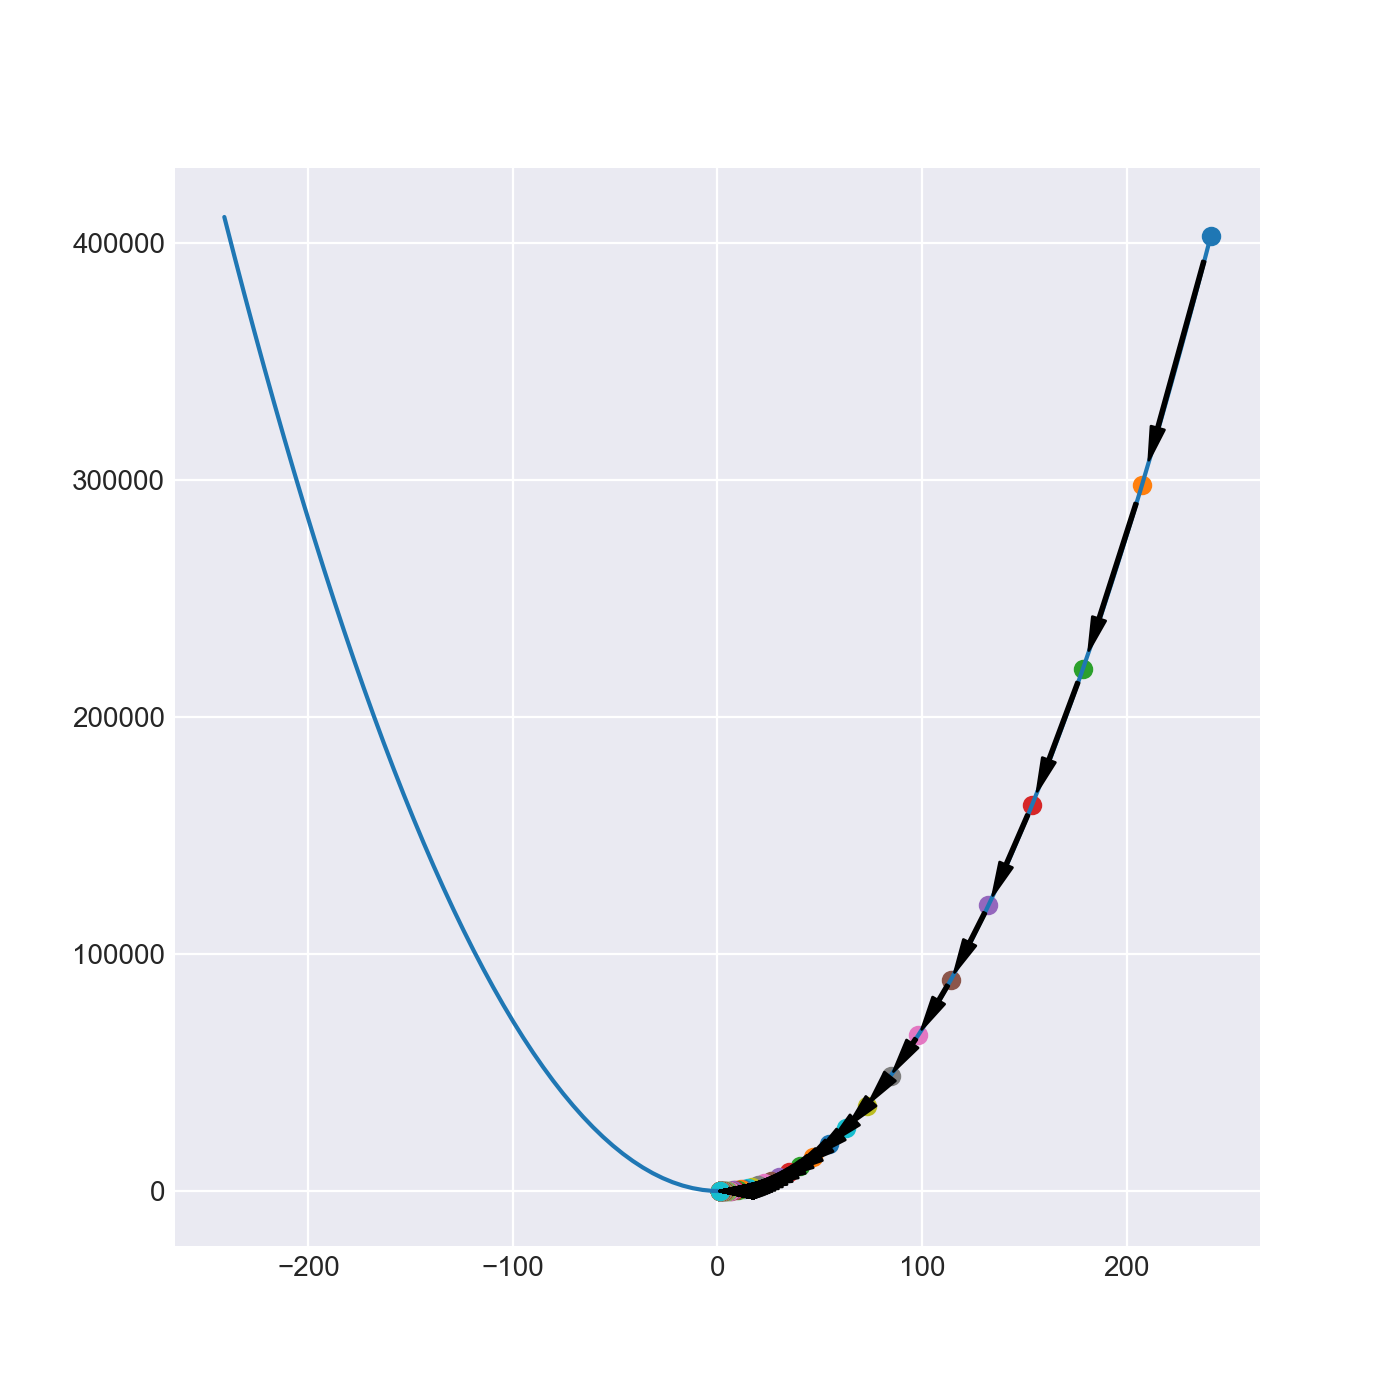

1.2143533035697596


In [11]:
# lets try to generalize the algorithm




    
    
import sympy as sp

x = sp.Symbol('x')

minimize_this_function = 18*x**2 - 10000*x**-5 + 9078
print(sp.diff(minimize_this_function, x))

36*x + 50000/x**6


<IPython.core.display.Javascript object>


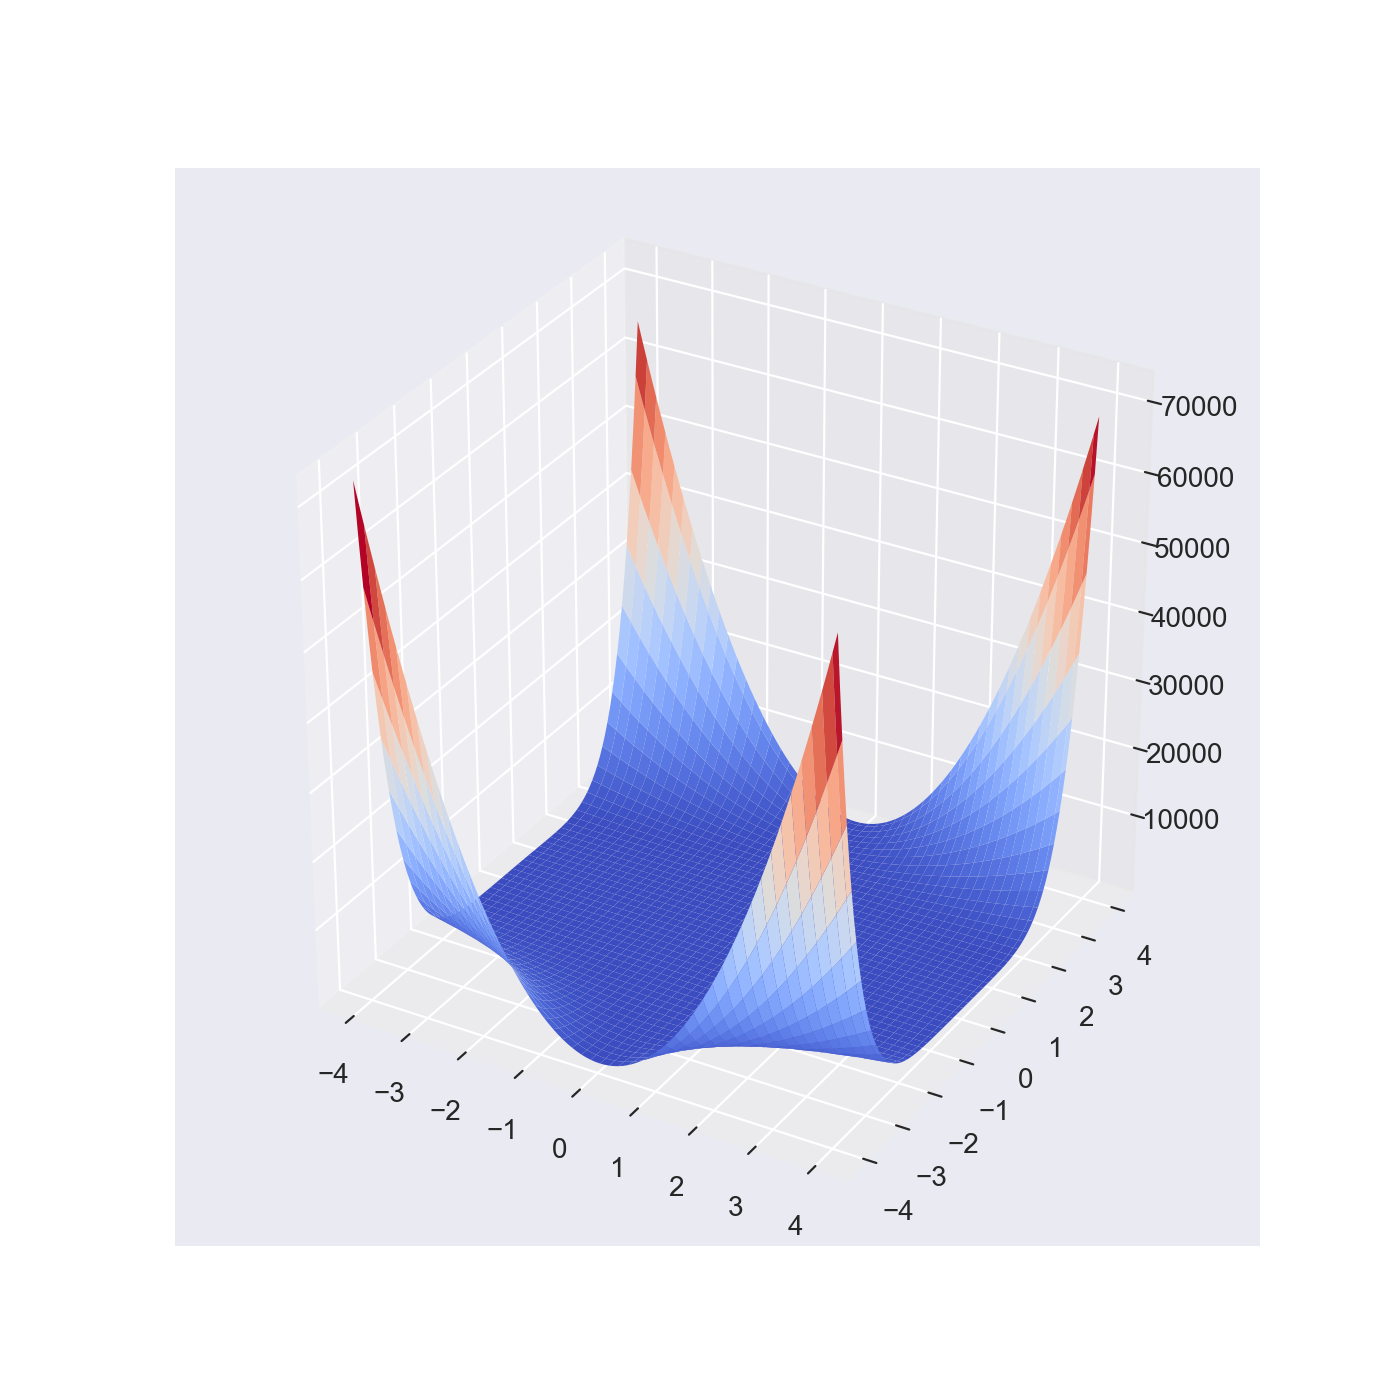

<IPython.core.display.Javascript object>


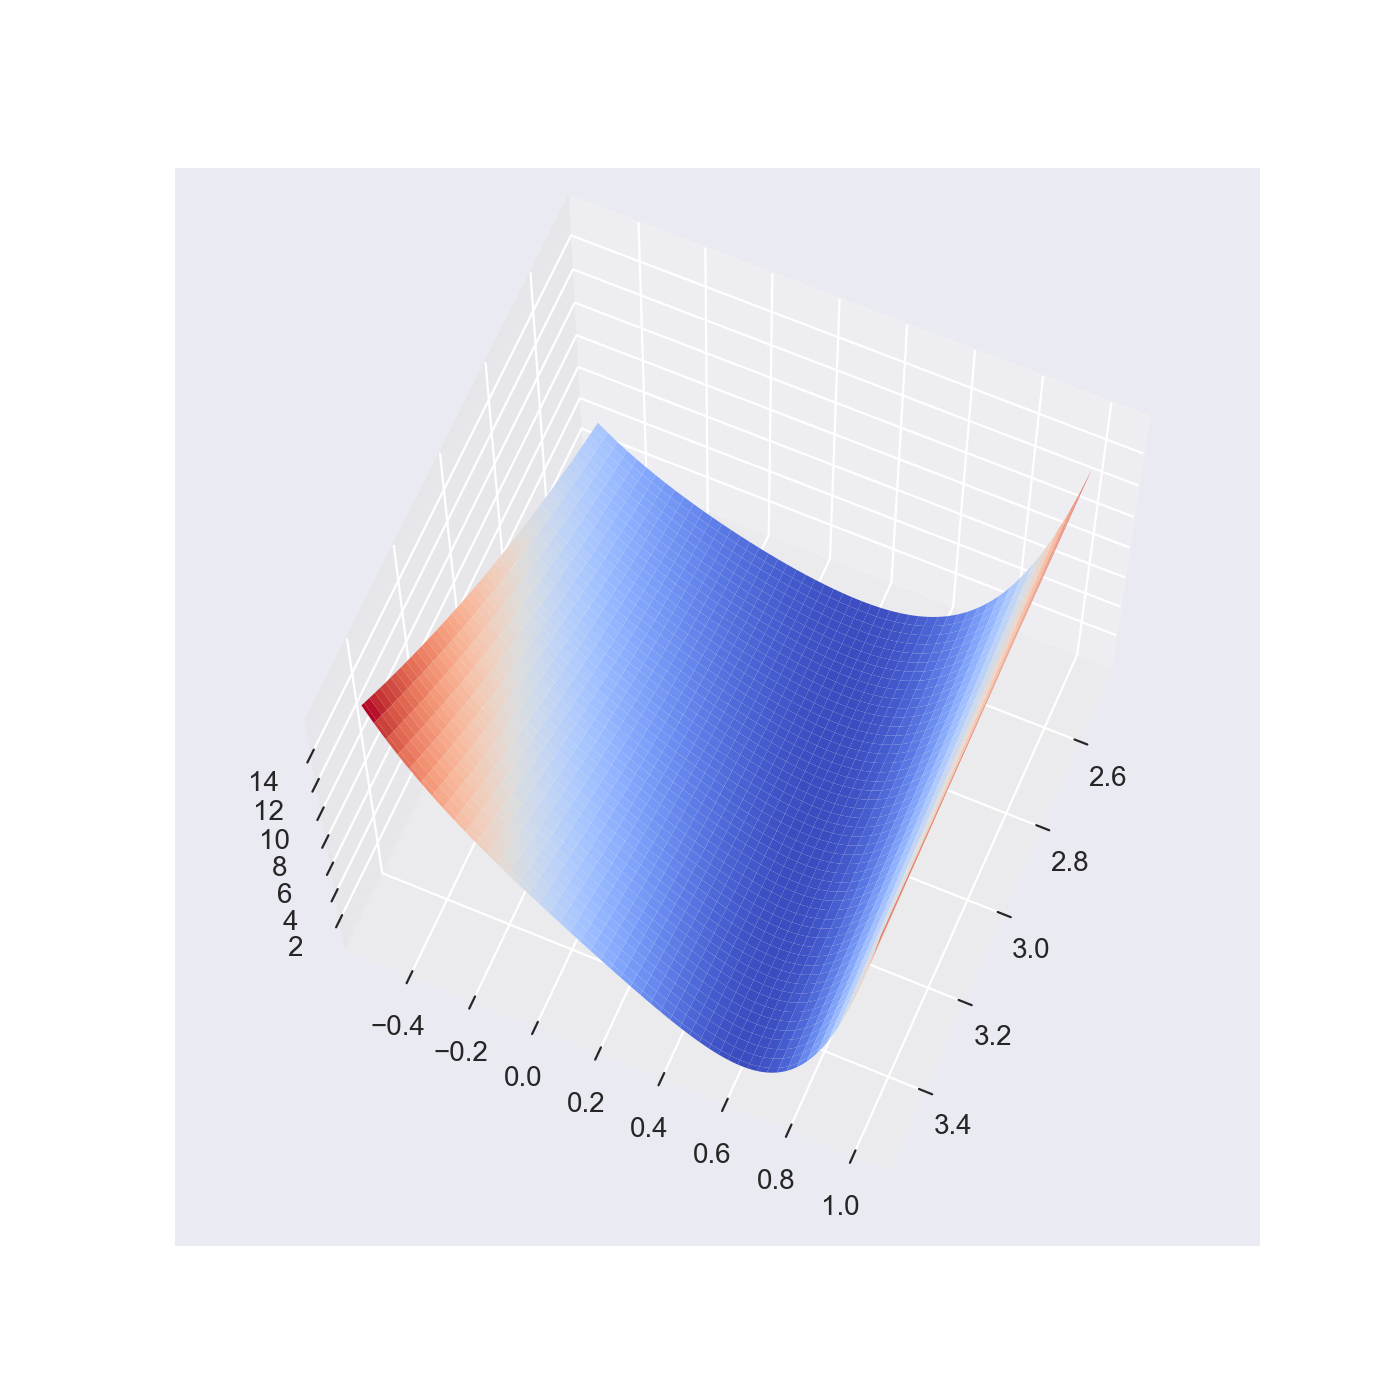

<IPython.core.display.Javascript object>


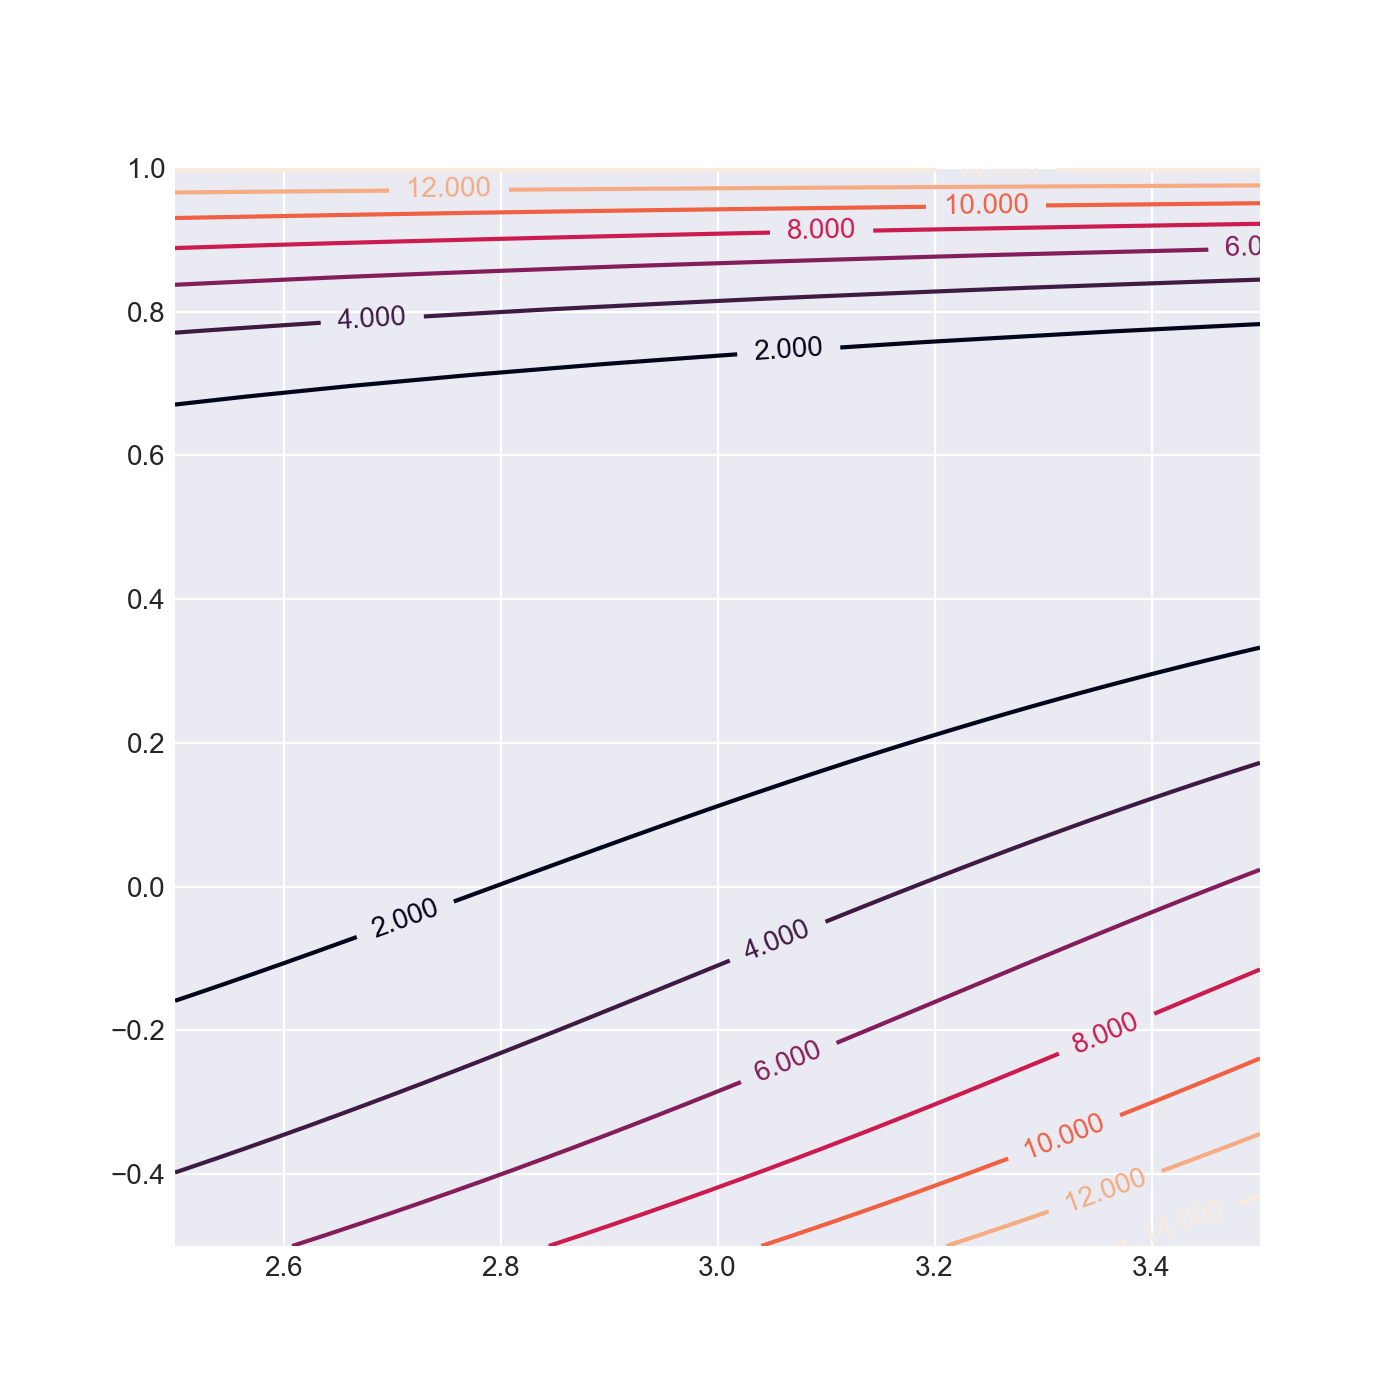

<a list of 14 text.Text objects>

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection = '3d')

#this is the beale function
def xyfun(x, y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

x = y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
zs = np.array([xyfun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, linewidth = 0)
plt.show()


#zoom in
fig = plt.figure()
ax = fig.gca(projection = '3d')

x = np.linspace(2.5, 3.5, 100)
y = np.linspace(-0.5, 1, 100)
X, Y = np.meshgrid(x, y)
zs = np.array([xyfun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, linewidth = 0)
plt.show()

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)